In [1]:
from google.colab import drive
import numpy as np
import glob
drive.mount('/content/gdrive')
import torch.nn as nn 
import numpy as np
import torch
import torchvision.models as models
import string
import matplotlib.pyplot as plt
import torch.optim as optim
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
!pip install hazm
from hazm import word_tokenize as per_word_tokenize
from hazm import Normalizer
import math
from nltk.translate import nist_score, bleu_score
!pip install pyonmttok
!pip install nltk==3.4
import pyonmttok
!pip install bpemb
from bpemb import BPEmb

Mounted at /content/gdrive
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
     |████████████████████████████████| 317kB 28.0MB/s 
     |████████████████████████████████| 235kB 47.2MB/s 
     |████████████████████████████████| 1.4MB 33.5MB/s 
  Created wheel for libwapiti: filename=libwapiti-0.2.1-cp37-cp37m-linux_x86_64.whl size=154269 sha256=600a8acacd636bc21a602c32061e03bf93af6ade5ccd42a7609cf3d7e63481e9
  Stored in directory: /root/.cache/pip/wheels/66/15/54/4510dce8bb958b1cdd2c47425cbd1e1eecc0480ac9bb1fb9ab
  Created wheel for nltk: filename=nltk-3.3-cp37-none-any.whl size=1394486 sha256=fa4a6393d3f90fc34cd85869dfc5cf7c2c42685f58521a8f5b77f82d6f6f3359
  Stored in directory: /root/.cache/pip/wheels/d1/ab/40/3bceea46922767e42986aef7606a600538ca80de6062dc266c
Successfully built libwapiti nltk
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


     |████████████████████████████████| 14.3MB 215kB/s 
     |████████████████████████████████| 1.4MB 29.9MB/s 
  Created wheel for nltk: filename=nltk-3.4-cp37-none-any.whl size=1436400 sha256=e366aca6f051f4a79dfc55e36ff31494730205b699a5593e332d68f3f52d08df
  Stored in directory: /root/.cache/pip/wheels/4b/c8/24/b2343664bcceb7147efeb21c0b23703a05b23fcfeaceaa2a1e
Successfully built nltk
ERROR: hazm 0.7.0 has requirement nltk==3.3, but you'll have nltk 3.4 which is incompatible.
  Found existing installation: nltk 3.3
    Uninstalling nltk-3.3:
      Successfully uninstalled nltk-3.3


     |████████████████████████████████| 1.2MB 42.9MB/s 


### Downloading data:

In [ ]:
from google.colab import files
files.upload()

Saving AFEC-merged-all.zip to AFEC-merged-all.zip


In [ ]:
!unzip -q /content/AFEC*.zip  -d /content/gdrive/MyDrive/AFEC

In [ ]:
from google.colab import files
files.upload()

Saving Test.zip to Test.zip


{'Test.zip': b'PK\x03\x04\n\x00\x00\x00\x00\x00\x12\x86\xabP\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x05\x00\x00\x00Test/PK\x03\x04\x14\x00\x00\x00\x08\x00\xcfL\x97G\xc5L\xbfj\xcc\x0e\x00\x00E3\x00\x00\x0c\x00\x00\x00Test/test.en\x95[Y\x8f\xe36\x12~\xf7\xaf\xe0\x06\x03\xe4\xa5G\x7f\xc1H\xf6H\x9cEc\x03$\xd8<\xd3\x12e1-\x91^\x92j\x8f\xf3\xeb\xb7\xaaxS\xb2{\xe6%\xe3\xb6y\xd4\xf9\xd5\xc1\xca$\xe6Y\xb3\x176hv\x13l0\xf2]0\xa7/\xc2M\xc2\xc0\x07\xf63W\xfa\x1d>j\xc5\xe0+\xe6nB\xb9\xfbg!/\x93\x9b\x98\x1e\xd9+7\xfd\xc4\x8e\x07\xe9\x98\xb4l\xd1F\xb0^/\xa36\x8e\x9fg\xc1\xcew\xe6\x0c\x97\x8au\x07\xb8\xe1\xaeWv\xd1\xf8e\xcf\r\xe3j`\xa7\xf0\xb7_t<\x9c\xd8M\xaf\xf3\xc0f\xf9\x86tT\xbfv\xb4\xe36q\x17\x16\xe1q\xb4\x10\xae\x1f\x91|\xc7\xdf\x04\x91\xf9\xe9\xf4\xf9\xd3\xdf?\x7f\xfag\xd8\t;\xac\xfc\xc2\xae\xdc\xc2\x07\xf1.\x14{\xc1\xe579\xcf\x8c\x1b\xe2\x99\xbb\xc8\xdb\x88\x7f\xd2R\xe2\x12(\xbfM\xb2\x9f\x80\xe4\x11o\xc2\xe3\xe9#\xec\xb8\xce\xdc\x01\xab\x0b\x1b\xf5j\x9c\x10\xc8&^\xa7\x90A\x0bKX?\t~e\x9

In [ ]:
!unzip -q T*.zip  -d /content/gdrive/MyDrive/AFEC

### Reading data:

In [2]:
class Data:
    def __init__(self, file_name):
        self.english_sentence = []
        self.persian_sentence = []
        self.english_sentence_valid = []
        self.persian_sentence_valid = []
        self.test = []
        self.test_fa2 = []
        self.test_fa1 = []
        self.test_fa0 = []
        self.test_fa3 = []
        self.max_len = 0
        self.vocabtoindex_en  = {"<SOS>":0,"<padd>":1,"<EOS>":2, "<UKN>" : 3}
        self.vocabtocount_en  = {}
        self.indextovocab_en  = {0:"<SOS>",1:"<padd>",2:"<EOS>", 3: "<UKN>"}
        self.vocabtocount_fa  = {}
        self.vocabtoindex_fa  = {"<SOS>":0,"<padd>":1,"<EOS>":2, "<UKN>" : 3}
        self.indextovocab_fa  = {0:"<SOS>",1:"<padd>",2:"<EOS>", 3: "<UKN>"}
        validation = np.random.choice([0,1,2,3,4,5,6,7,8,9])
        print(validation)
        counter = 0
        with open(file_name+"AFEC-merged.fa", 'r') as file:
            data = file.read().split("\n")
            for d in data:
                self.counter_fa(d)
        counter = 0
        with open(file_name+"AFEC-merged.en", 'r') as file:
            data = file.read().split("\n")
            for d in data:
                self.counter_en(d)
        
        counter = 0
        with open(file_name+"AFEC-merged.en", 'r') as file:
            data = file.read().split("\n")
            for d in data:
                d = self.cleaner_en(d)
                if counter % 10 == validation:
                    self.english_sentence_valid.append(d)
                else:
                    self.english_sentence.append(d)
                if len(d) > self.max_len:
                    self.max_len = len(d)
                counter = counter + 1
        counter = 0
        with open(file_name+"AFEC-merged.fa", 'r') as file:
            data = file.read().split("\n")
            for d in data:
                d = self.cleaner_fa(d)
                if counter % 10 == validation:
                    self.persian_sentence_valid.append(d)
                else:
                    self.persian_sentence.append(d)
                if len(d) > self.max_len:
                    self.max_len = len(d)
                counter = counter + 1
        with open(file_name+"/Test/test.en", 'r') as file:
            data = file.read().split("\n")
            for d in data:
                d = self.cleaner_en(d)
                self.test.append(d)
                if len(d)>self.max_len:
                    self.max_len = len(d)
        
        with open(file_name+"/Test/test.fa0", 'r') as file:
            data = file.read().split("\n")
            for d in data:
                d = self.cleaner_fa(d)
                self.test_fa0.append(d)
                if len(d)>self.max_len:
                    self.max_len = len(d)
        with open(file_name+"/Test/test.fa1", 'r') as file:
            data = file.read().split("\n")
            for d in data:
                d = self.cleaner_fa(d)
                self.test_fa1.append(d)
                if len(d)>self.max_len:
                    self.max_len = len(d)
        with open(file_name+"/Test/test.fa2", 'r') as file:
            data = file.read().split("\n")
            for d in data:
                d = self.cleaner_fa(d)
                self.test_fa2.append(d)
                if len(d)>self.max_len:
                    self.max_len = len(d)
        with open(file_name+"/Test/test.fa3", 'r') as file:
            data = file.read().split("\n")
            for d in data:
                d = self.cleaner_fa(d)
                self.test_fa3.append(d)
                if len(d)>self.max_len:
                    self.max_len = len(d)
    def cleaner_en(self, text):
        text = text.translate(str.maketrans('', '', string.punctuation))
        text = text.lower().replace("  ", " ").replace("  ", " ")
        token = word_tokenize("SOS "+text+" EOS")
        token[0] = "<SOS>"
        token[-1] = "<EOS>"
        tokens = []
        for t in token:
            if t not in self.vocabtocount_en or self.vocabtocount_en[t]> 10:
                if t not in self.vocabtoindex_en:
                    self.vocabtoindex_en[t] = len(self.vocabtoindex_en)
                    self.indextovocab_en[len(self.indextovocab_en)] = t
                tokens.append(self.vocabtoindex_en[t])
            else:
                tokens.append(3)
        return np.array(tokens)
    def counter_en(self, text):
        text = text.translate(str.maketrans('', '', string.punctuation))
        text = text.lower().replace("  ", " ").replace("  ", " ")
        token = word_tokenize("SOS "+text+" EOS")
        token[0] = "<SOS>"
        token[-1] = "<EOS>"
        for t in token:
            if t not in self.vocabtocount_en:
                self.vocabtocount_en[t] = 0
            else:
                self.vocabtocount_en[t] = self.vocabtocount_en[t] + 1
        return 
    def cleaner_fa(self, text):
        text = text.translate(str.maketrans('', '', string.punctuation))
        text = text.replace("  ", " ").replace("  ", " ").replace("\u200c"," ").replace("\xad"," ")  
        normalizer = Normalizer()
        token = per_word_tokenize("SOS "+text+" EOS")
        token[0] = "<SOS>"
        token[-1] = "<EOS>"
        tokens = []
        for t in token:
            if t not in self.vocabtocount_fa or self.vocabtocount_fa[t] > 10:
                if t not in self.vocabtoindex_fa:
                    self.vocabtoindex_fa[t] = len(self.vocabtoindex_fa)
                    self.indextovocab_fa[len(self.indextovocab_fa)] = t
                tokens.append(self.vocabtoindex_fa[t])
            else:
                tokens.append(3)
        return np.array(tokens)
    def counter_fa(self, text):
        text = text.translate(str.maketrans('', '', string.punctuation))
        text = text.replace("  ", " ").replace("  ", " ").replace("\u200c"," ").replace("\xad"," ")
        normalizer = Normalizer()
        token = per_word_tokenize("SOS "+text+" EOS")
        token[0] = "<SOS>"
        token[-1] = "<EOS>"
        for t in token:
            if t not in self.vocabtocount_fa:
                self.vocabtocount_fa[t] = 0
            else:
                self.vocabtocount_fa[t] = self.vocabtocount_fa[t] + 1
        return 

In [3]:
data = Data("/content/gdrive/MyDrive/AFEC/")

9


### Hyperparameters

In [4]:
batch_size = 64
emd_size_encoder = 256
num_heads_encoder = 8
emd_size_decoder = 256
num_heads_decoder = 8
dim_key = 64
dim_value = 64
dim_inner = 1024
enc_layer = 3
dec_layer = 3
lr = 0.0001
Betas=(0.9, 0.98)
eps=1e-9
en_vocab = len(data.vocabtoindex_en)
fa_vocab = len(data.vocabtoindex_fa)
max_len = data.max_len

### Network:

In [26]:
class Embedding(nn.Module):
    def __init__(self, vocab_size, embedding_dim, padding_idx = None):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=padding_idx)
    def forward(self, x):
        return self.embedding(x)

class PositionalEncoder(nn.Module):
    def __init__(self, max_len, dmodel):
        super().__init__()
        pe = torch.zeros(max_len, dmodel)
        for i in range(max_len):
            for j in range(dmodel):
                pow = 2* j/ dmodel
                if j % 2 == 0:
                    pe[i,j] = math.sin(i/ 10000**pow)
                else:
                    pe[i,j] = math.cos(i/ 10000**pow)
        pe = pe.unsqueeze(0)
        if device_flag_gpu:
            pe = pe.cuda()
        self.pe = pe
        #self.pe = pe.requires_grad_(False)
        self.dmodel = dmodel
    def forward(self, x):
        with torch.no_grad():
            x = x * math.sqrt(self.dmodel)
            pe = self.pe[:x.size(0), :x.size(1)]#pe = self.pe[:, :x.size(1)]#1
            #Drop out?
            x = x + pe
            return x


class SelfAttention(nn.Module):
    def __init__(self, emd_size, num_heads, dim_key, dim_value, d_k, eps=1e-5):
        super().__init__()
        self.query_linear = nn.Linear(emd_size,num_heads*dim_key)
        self.key_linear = nn.Linear(emd_size, num_heads * dim_key)
        self.value_linear = nn.Linear(emd_size, num_heads*dim_value)
        self.attention = Attention(num_heads, dim_key, dim_value, math.sqrt(d_k))
        self.layernorm = nn.LayerNorm((emd_size,), elementwise_affine=True, eps=eps)#[d_model]
        self.linear = nn.Linear(num_heads* dim_value, emd_size)
        self.dropout = nn.Dropout(0.1)
        self.num_heads = num_heads
        self.dim_key = dim_key
        self.dim_value = dim_value
        #self.head_dim = emd_size//num_heads
    
    def forward(self, x, input_mask):
        #print("x shape")
        #print(x.shape)
        q = self.query_linear(x)
        k = self.key_linear(x)
        v = self.value_linear(x)
        #print("qkv shape")
        #print(q.shape, k.shape, v.shape) #batch_size, seq_length, num_heads*dim_key/value
        #x = self.attention(q,k,v,self.scale)
        '''attn_scores = torch.bmm(q, k.permute(0, 2, 1))/self.scale#torch.matmul(q, k.transpose(-2, -1))/self.scale
        softmax = nn.Softmax(dim=-1)
        attention = softmax(attn_scores)
        values = torch.matmul(attention, v)'''
        attention = self.attention(q, k, v, input_mask).reshape(x.shape[0], x.shape[1], self.num_heads * self.dim_value)
        #attention?
        return self.layernorm(self.dropout(self.linear(attention)) + x)#relu dropout




class POS_FFN(nn.Module):
    def __init__(self, emd_size, dim_inner, eps = 1e-5):
        super().__init__()
        self.linear1 = nn.Linear(emd_size, dim_inner)
        self.linear2 = nn.Linear(dim_inner, emd_size)
        self.dropout = nn.Dropout(0.1)
        self.layernorm = nn.LayerNorm((emd_size,), elementwise_affine=True, eps=eps)
    def forward(self, x):
        return self.layernorm(self.dropout(self.linear2(self.dropout(torch.relu(self.linear1(x))))) + x)#relu dropout


class Attention(nn.Module):
    def __init__(self, num_heads, dim_key, dim_value, scale):
        super().__init__()
        self.dropout = nn.Dropout(0.1)
        self.softmax = nn.Softmax(dim=-1)
        self.num_heads, self.dim_key, self.dim_value, self.scale = num_heads, dim_key, dim_value, scale
    def forward(self, q, k, v, input_mask):
        q = q.reshape(q.shape[0], q.shape[1], self.num_heads, self.dim_key).permute(0, 2, 1, 3)
        k = k.reshape(k.shape[0], k.shape[1], self.num_heads, self.dim_key).permute(0, 2, 1, 3)
        v = v.reshape(v.shape[0], v.shape[1], self.num_heads, self.dim_value).permute(0, 2, 1, 3)
        #print(q.shape, k.shape, v.shape)#batch_size, num_heads, seq_length, dim_key/value
        #x = self.attention(q,k,v,self.scale)
        attention_scores = torch.matmul(q, k.permute(0, 1, 3, 2))/self.scale
        attention_scores = attention_scores + input_mask * -1e9
        #input_mask = input_mask.unsqueeze(1)
        #attention_scores = attention_scores.masked_fill_(input_mask == 1, -1 * np.inf)
        #print("attention shape")
        #print(attention_scores.shape)##batch_size, num_heads, seq_length, seq_length
        attention = self.dropout(self.softmax(attention_scores))
        values = torch.matmul(attention, v)#.reshape(v.shape[0], v.shape[1], self.num_heads * self.dim_value)
        #print("values shape")
        #print(values.shape)#batch_size, num_heads, seq_length, dim_value
        values = values.permute(0, 2, 1, 3).contiguous()
        #print(values.shape)#batch_size, seq_length, num_heads, dim_value
        return values



class Encoder(nn.Module):
    def __init__(self, emd_size, num_heads, dim_key, dim_value, dim_inner, eps):
        super().__init__()
        d_k = dim_key#????
        self.multiheadattention = SelfAttention(emd_size, num_heads, dim_key, dim_value, d_k, eps)
        self.layernorm = nn.LayerNorm((emd_size,), elementwise_affine=True, eps=eps)
        self.feedforward = POS_FFN(emd_size, dim_inner, eps )
    def  forward(self, x, input_mask, adding = True):
        mha = self.multiheadattention(x, input_mask)
        #if adding:
        #    x = x + mha
        #else:
        #   x = mha#? x = x
        #xnorm = self.layernorm(x)
        #x = xnorm + self.feedforward(xnorm) #xnorm + ?
        return self.feedforward(mha)


class Translator(nn.Module):
    def __init__(self, en_vocab, fa_vocab, embedding_dim, max_len, enc_layer, dec_layer,  num_heads_enc, num_heads_dec, dim_key, dim_value, dim_inner, padding_idx = None, eps = 1e-5):
        super().__init__()
        # input embedding
        self.input_embedding = Embedding(en_vocab, embedding_dim, padding_idx)
        # output embedding
        self.output_embedding = Embedding(fa_vocab, embedding_dim, padding_idx)
        # positional encoder
        self.positional_encoder = PositionalEncoder(max_len, embedding_dim)
        #enc X n 
        self.encoder = nn.ModuleList([Encoder(embedding_dim,  num_heads_enc, dim_key, dim_value, dim_inner, eps) for i in range(enc_layer)])
        #dec X n
        self.decoder = nn.ModuleList([nn.TransformerDecoderLayer(embedding_dim, num_heads_dec, batch_first=True) for i in range(dec_layer)])
        #linearsoftmax Attention?
        self.linear = nn.Linear(embedding_dim, fa_vocab)
        self.softmax = nn.Softmax(dim=-1)
    def forward(self, input, output, input_mask, output_mask):
        output_mask = torch.tensor(output == 1)
        mask = self.generate_look_ahead_mask(output.shape[1])
        input_embed = self.positional_encoder(self.input_embedding(input)) 
        output_embed = self.positional_encoder(self.output_embedding(output))
        for i in self.encoder:
            input_embed = i(input_embed, input_mask)
        #print(mask.shape)
        #mask = torch.maximum(mask, output_mask)
        #print(mask.shape)
        if device_flag_gpu:
            mask = mask.cuda()
            output_mask = output_mask.cuda()
            input_mask = input_mask.cuda()
        for i in self.decoder:
            output_embed = i(output_embed, input_embed, tgt_mask = mask.squeeze(1), tgt_key_padding_mask= output_mask.squeeze(1).squeeze(1))#, memory_key_padding_mask = input_mask.squeeze(1).squeeze(1), memory_key_padding_mask = input_mask, tgt_key_padding_mask= output_mask
        return self.linear(output_embed)#relu dropout
    def greedy_search(self, input, max_length):
        input_tensor = torch.LongTensor(input).unsqueeze(0).cuda()
        input_mask = torch.zeros(1, 1, len(input), dtype=torch.bool).cuda()     
        input_embed = self.positional_encoder(self.input_embedding(input_tensor)).cuda() 
        for i in self.encoder:
            input_embed = i(input_embed, input_mask)
        trg_indexes = [0]    
        for i in range(max_len):
            trg_tensor = torch.LongTensor(trg_indexes).unsqueeze(0).cuda()
            output_embed = self.positional_encoder(self.output_embedding(trg_tensor.long().cuda()))
            trg_mask = (self.generate_look_ahead_mask(len(trg_indexes)).type(torch.bool)).cuda()   
            for dcd in self.decoder:
                output_embed = dcd(output_embed, input_embed, trg_mask).cuda()          
            pred_token =  torch.argmax(self.linear(output_embed).squeeze(0), dim=-1)[i].item()  
            trg_indexes.append(pred_token)
            if pred_token == 2:
                break
        
        return trg_indexes

    def generate_look_ahead_mask(self, l):
        mask = (torch.triu(torch.ones(l,l)) == 1).transpose(0,1)
        mask = mask.float().masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, 0.0)#1 => -inf#2
        return mask

    

In [6]:
def creat_minibatch(data,batch_size=20):
    merged = [i for i in range(len(data))]
    np.random.shuffle(merged)
    batch = []
    i = 0
    while i < len(merged):
        x = merged[i:i+batch_size]
        batch.append(x)
        i = i + batch_size
    return batch
def padd(tokens, l, target = False):
    tokens = [list(t) for t in tokens]
    mask = torch.zeros(len(tokens), 1, l, dtype=torch.bool)
    if target:
        mask = torch.zeros(len(tokens), 1, l-1, dtype=torch.bool)
    for token in range(len(tokens)):
        lp = len(tokens[token])
        for i in range(l-lp):
            tokens[token][-1] = 1
            tokens[token].append(2)
            mask[token][0][i+lp-1] = 1
    if False:#target:
        mask = mask & torch.tril(torch.ones([1, l, l], dtype=torch.bool))
    return tokens, torch.tensor(mask, dtype = torch.bool).unsqueeze(1)

### Part 1:

epoch epoch training:

In [ ]:
def initialize_weights(m):
    if hasattr(m, 'weight') and m.weight.dim() > 1:
        nn.init.xavier_uniform_(m.weight.data)
device_flag_gpu = True
net = Translator(en_vocab, fa_vocab, emd_size_encoder, max_len, enc_layer, dec_layer,  num_heads_encoder, num_heads_decoder, dim_key, dim_value, dim_inner, 1)
if False:
    net.load_state_dict(torch.load('/content/gdrive/MyDrive/net'))
    net.eval()
net.cuda()
net.apply(initialize_weights)
optimizer =  optim.Adam(net.parameters(), lr=lr, betas=Betas, eps = eps)
loss = nn.CrossEntropyLoss(ignore_index=1)#
trainlosslog = []
validlosslog = []
print("training loss, validation loss")
for j in range(10):
    batchindxs = creat_minibatch(data.english_sentence, batch_size)
    losslog = []
    for i in range(9):
        for batchindx in batchindxs[i*1000:min(len(batchindxs),i*1000+1000)]:
            x1 = np.array(data.english_sentence)[batchindx]
            x2 = np.array(data.persian_sentence)[batchindx]
            l1 = np.max([len(t) for t in x1])
            l2 = np.max([len(t) for t in x2])
            x1, input_mask = padd(x1,max(l1,l2))
            x2, output_mask = padd(x2,max(l1,l2), True)
            out = net(torch.tensor(x1).cuda(),torch.tensor(np.array(x2)[:,:-1]).cuda(), input_mask.cuda(), output_mask.cuda())
            #x = torch.argmax(out[0],dim = -1)
            #print([data.indextovocab_fa[d] for d in x2[0]])
            #print([data.indextovocab_fa[d] for d in x.tolist()])
            out = loss(out.contiguous().reshape(-1, out.shape[2]),torch.tensor(np.array(x2)[:,1:]).contiguous().view(-1).long().cuda())
            losslog.append(out.cpu().detach().numpy())
            #print(losslog[-1])
            optimizer.zero_grad()
            out.backward()
            torch.nn.utils.clip_grad_norm_(net.parameters(), 5)
            optimizer.step()  
        trainlosslog.append(np.mean(losslog))
        torch.save(net.state_dict(), '/content/gdrive/MyDrive/AFEC/netpart1v3')
        losslog = []
        batchindxs = creat_minibatch(data.english_sentence_valid, batch_size)
        for batchindx in batchindxs:
            x1 = np.array(data.english_sentence_valid)[batchindx]
            x2 = np.array(data.persian_sentence_valid)[batchindx]
            l1 = np.max([len(t) for t in x1])
            l2 = np.max([len(t) for t in x2])
            x1, input_mask = padd(x1,max(l1,l2))
            x2, output_mask = padd(x2,max(l1,l2), True)
            out = net(torch.tensor(x1).cuda(),torch.tensor(x2)[:,:-1].cuda(), input_mask.cuda(), output_mask.cuda())
            out = loss(out.contiguous().reshape(-1, out.shape[2]),torch.tensor(np.array(x2))[:,1:].contiguous().view(-1).long().cuda())
            losslog.append(out.cpu().detach().numpy())
            #optimizer.zero_grad()
            #out.backward()
            #optimizer.step()  
        validlosslog.append(np.mean(losslog))
        print(trainlosslog[-1], validlosslog[-1])

training loss, validation loss


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:143: UserWarning: 

6.9657125 6.4689674
6.4605947 6.449489
6.449489 6.4493546
6.4493546 6.4490523
6.4490523 6.4495087
6.4495087 6.4494023
6.4494023 6.4489
6.4489 6.4496064
6.4496064 6.4492126
6.252212 6.0983453
6.0866594 6.0954585
6.0954585 6.095495
6.095495 6.0954366
6.0954366 6.0949774
6.0949774 6.0949564
6.0949564 6.095567
6.095567 6.094706
6.094706 6.0948873
5.959551 5.8650618
5.8488116 5.864218
5.864218 5.865051
5.865051 5.864659
5.864659 5.8654246
5.8654246 5.8647704
5.8647704 5.864128
5.864128 5.8645186
5.8645186 5.864687
5.7519045 5.697643
5.678428 5.6982403
5.6982403 5.698931
5.698931 5.698806
5.698806 5.6988873
5.6988873 5.699809
5.699809 5.6989985
5.6989985 5.6986284
5.6986284 5.69848
5.598555 5.545737
5.5263596 5.5565104
5.5565104 5.5569286
5.5569286 5.556346
5.556346 5.556797
5.556797 5.557654
5.557654 5.5562325
5.5562325 5.5563955
5.5563955 5.556261
5.4706006 5.4370866
5.415136 5.4324036
5.4324036 5.432862
5.432862 5.4336386
5.4336386 5.4329348
5.4329348 5.4326577
5.4326577 5.4336553
5.43365

In [ ]:
test_index = np.random.choice([i for i in range(len(data.test))], 10)

In [34]:
for i in test_index:
    print([data.indextovocab_en[d] for d in data.test[i]])
    print([data.indextovocab_fa[d] for d in data.test_fa0[i]])
    out = net.greedy_search(data.test[i],len(data.test[i]))
    print([data.indextovocab_fa[d] for d in out])
    print("____________")

['<SOS>', 'i', 'agree', 'we', 'need', 'a', 'hotel', 'in', 'hanover', '<EOS>']
['<SOS>', 'موافقم', 'ما', 'در', 'هانوور', 'به', 'یک', 'هتل', 'احتیاج', 'داریم', '<EOS>']
['<SOS>', 'من', 'می', 'توانم', 'در', 'یک', 'روز', 'در', 'یک', 'روز', 'در', 'یک', 'روز', 'در', 'یک', 'روز', 'در', 'یک', 'شنبه', 'در', 'یک', 'مدرسه', 'در', 'یک', 'مدرسه', 'در', 'یک', 'مدرسه', 'در', 'یک', 'مدرسه', 'در', 'یک', 'مدرسه', 'در', 'یک', 'مدرسه', 'در', 'یک', 'مدرسه', 'می', 'کنیم', 'که', 'در', 'یک', 'مدرسه', 'می', 'توانیم', 'یک', 'کار', 'می', 'کنیم', '<EOS>']
____________
['<SOS>', 'let', 'us', 'take', 'the', 'train', 'at', 'nine', '<UKN>', '<EOS>']
['<SOS>', 'اجازه', 'دهید', 'قطار', 'ساعت', 'نه', 'را', 'بگیریم', '<EOS>']
['<SOS>', 'پس', 'ما', 'در', 'روز', 'در', '<UKN>', '<UKN>', 'در', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '

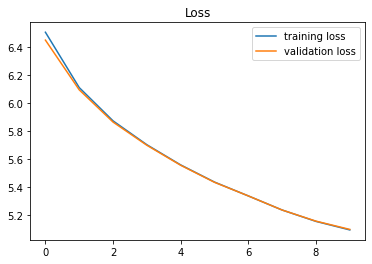

In [ ]:
plt.plot([np.mean(trainlosslog[i*9:i*9+9]) for i in range(10)], label = "training loss")
plt.plot([np.mean(validlosslog[i*9:i*9+9]) for i in range(10)], label = "validation loss")
plt.title("Loss")
plt.legend()
plt.show()

In [ ]:
for batchindx in [[i for i in range(16)], [i+16 for i in range(16)]]:
        x1 = np.array(data.english_sentence_valid)[batchindx]
        x2 = np.array(data.persian_sentence_valid)[batchindx]
        l1 = np.max([len(t) for t in x1])
        l2 = np.max([len(t) for t in x2])
        x1, input_mask = padd(x1,max(l1,l2))
        x2, output_mask = padd(x2,max(l1,l2), True)
        out = net(torch.tensor(x1).cuda(),torch.tensor(x2).cuda(), input_mask.cuda(), output_mask.cuda())
        x = torch.argmax(out[0],dim = -1)
        print([data.indextovocab_en[d] for d in x1[0]])
        print([data.indextovocab_fa[d] for d in x.tolist()])
        out = loss(out.reshape(-1, out.shape[2]),torch.tensor(x2).view(-1).long().cuda())

['<SOS>', 'tajiks', 'have', 'until', 'july', '1', '2009', 'to', 'legalise', 'their', 'property', 'holdings', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<EOS>']
['<SOS>', 'مردم', 'تاجیکستان', 'تا', 'اول', 'ژوئیه', 'سال', '۲۰۰۹', 'فرصت', 'دارند', 'تا', 'دارایی\u200cهای', 'خود', 'را', 'قانونی', 'کنند', '<SOS>', 'ذهنی', 'آل', 'شمارش', '<SOS>', '<SOS>', '<SOS>', '<SOS>', '<SOS>', '<SOS>', '<SOS>', '<SOS>', '<SOS>', '<SOS>', '<SOS>', '<SOS>', '<SOS>', '<SOS>', 'جوانی', '<SOS>', '<SOS>', '<SOS>', '<SOS>', '<SOS>', '<SOS>', '<SOS>', 'مایکل', 'متأسفم', '<SOS>', '<SOS>', '<EOS>']
['<SOS>', 'ashgabat', 'the', 'turkmen', 'parliament', 'may', '4', 'passed', 'an', 'education', 'bill', 'that', 'will', 'help'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTenso

In [35]:
ref = []
hypo = []
for i in range(len(data.test)):
    if i in [39, 60, 99, 216, 250]:
        continue
    out = net.greedy_search(data.test[i],len(data.test[i]))
    hypo.append(out)
    ref.append([data.test_fa0[i],data.test_fa1[i],data.test_fa2[i],data.test_fa3[i]])
print(bleu_score.corpus_bleu(ref, hypo))
print(nist_score.corpus_nist(ref, hypo))

0.011606251760537045
0.6695901166144211


Iteration Iteration:

In [ ]:
def initialize_weights(m):
    if hasattr(m, 'weight') and m.weight.dim() > 1:
        nn.init.xavier_uniform_(m.weight.data)
device_flag_gpu = True
net = Translator(en_vocab, fa_vocab, emd_size_encoder, max_len, enc_layer, dec_layer,  num_heads_encoder, num_heads_decoder, dim_key, dim_value, dim_inner, 1)
if False:
    net.load_state_dict(torch.load('/content/gdrive/MyDrive/AFEC/netpart1v3'))
    #net.eval()
net.cuda()
optimizer =  optim.Adam(net.parameters(), lr=lr, betas=Betas, eps = eps)
loss = nn.CrossEntropyLoss(ignore_index=1)#
trainlosslog = []
validlosslog = []
print("training loss, validation loss")
for j in range(10):
    batchindxs = creat_minibatch(data.english_sentence, batch_size)
    losslog = []
    i = 0
    #for i in range(9):
    if True:
        for batchindx in batchindxs[i*1000:min(len(batchindxs),i*1000+1000)]:
            x1 = np.array(data.english_sentence)[batchindx]
            x2 = np.array(data.persian_sentence)[batchindx]
            l1 = np.max([len(t) for t in x1])
            l2 = np.max([len(t) for t in x2])
            x1, input_mask = padd(x1,max(l1,l2))
            x2, output_mask = padd(x2,max(l1,l2), True)
            out = net(torch.tensor(x1).cuda(),torch.tensor(np.array(x2)[:,:-1]).cuda(), input_mask.cuda(), output_mask.cuda())
            #x = torch.argmax(out[0],dim = -1)
            #print([data.indextovocab_fa[d] for d in x2[0]])
            #print([data.indextovocab_fa[d] for d in x.tolist()])
            out = loss(out.contiguous().reshape(-1, out.shape[2]),torch.tensor(np.array(x2)[:,1:]).contiguous().view(-1).long().cuda())
            losslog.append(out.cpu().detach().numpy())
            #print(losslog[-1])
            optimizer.zero_grad()
            out.backward()
            torch.nn.utils.clip_grad_norm_(net.parameters(), 5)
            optimizer.step()  
        trainlosslog.append(np.mean(losslog))
        torch.save(net.state_dict(), '/content/gdrive/MyDrive/AFEC/netpart1v1')
        losslog = []
        batchindxs = creat_minibatch(data.english_sentence_valid, batch_size)
        for batchindx in batchindxs:
            x1 = np.array(data.english_sentence_valid)[batchindx]
            x2 = np.array(data.persian_sentence_valid)[batchindx]
            l1 = np.max([len(t) for t in x1])
            l2 = np.max([len(t) for t in x2])
            x1, input_mask = padd(x1,max(l1,l2))
            x2, output_mask = padd(x2,max(l1,l2), True)
            out = net(torch.tensor(x1).cuda(),torch.tensor(x2)[:,:-1].cuda(), input_mask.cuda(), output_mask.cuda())
            out = loss(out.contiguous().reshape(-1, out.shape[2]),torch.tensor(np.array(x2))[:,1:].contiguous().view(-1).long().cuda())
            losslog.append(out.cpu().detach().numpy())
            #optimizer.zero_grad()
            #out.backward()
            #optimizer.step()  
        validlosslog.append(np.mean(losslog))
        print(trainlosslog[-1], validlosslog[-1])

training loss, validation loss


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:143: UserWarning: 

6.605509 6.036926
5.8079176 5.6285377
5.4917903 5.386539
5.2910028 5.2191415
5.1350737 5.08993
5.003974 4.976812
4.9085255 4.883917
4.8088136 4.8086886
4.736619 4.738762
4.664216 4.6823406


In [ ]:
print("training loss, validation loss")
for j in range(10):
    batchindxs = creat_minibatch(data.english_sentence, batch_size)
    losslog = []
    i = 0
    #for i in range(9):
    if True:
        for batchindx in batchindxs[i*1000:min(len(batchindxs),i*1000+1000)]:
            x1 = np.array(data.english_sentence)[batchindx]
            x2 = np.array(data.persian_sentence)[batchindx]
            l1 = np.max([len(t) for t in x1])
            l2 = np.max([len(t) for t in x2])
            x1, input_mask = padd(x1,max(l1,l2))
            x2, output_mask = padd(x2,max(l1,l2), True)
            out = net(torch.tensor(x1).cuda(),torch.tensor(np.array(x2)[:,:-1]).cuda(), input_mask.cuda(), output_mask.cuda())
            #x = torch.argmax(out[0],dim = -1)
            #print([data.indextovocab_fa[d] for d in x2[0]])
            #print([data.indextovocab_fa[d] for d in x.tolist()])
            out = loss(out.contiguous().reshape(-1, out.shape[2]),torch.tensor(np.array(x2)[:,1:]).contiguous().view(-1).long().cuda())
            losslog.append(out.cpu().detach().numpy())
            #print(losslog[-1])
            optimizer.zero_grad()
            out.backward()
            torch.nn.utils.clip_grad_norm_(net.parameters(), 5)
            optimizer.step()  
        trainlosslog.append(np.mean(losslog))
        torch.save(net.state_dict(), '/content/gdrive/MyDrive/AFEC/netpart1v1')
        losslog = []
        batchindxs = creat_minibatch(data.english_sentence_valid, batch_size)
        for batchindx in batchindxs:
            x1 = np.array(data.english_sentence_valid)[batchindx]
            x2 = np.array(data.persian_sentence_valid)[batchindx]
            l1 = np.max([len(t) for t in x1])
            l2 = np.max([len(t) for t in x2])
            x1, input_mask = padd(x1,max(l1,l2))
            x2, output_mask = padd(x2,max(l1,l2), True)
            out = net(torch.tensor(x1).cuda(),torch.tensor(x2)[:,:-1].cuda(), input_mask.cuda(), output_mask.cuda())
            out = loss(out.contiguous().reshape(-1, out.shape[2]),torch.tensor(np.array(x2))[:,1:].contiguous().view(-1).long().cuda())
            losslog.append(out.cpu().detach().numpy())
            #optimizer.zero_grad()
            #out.backward()
            #optimizer.step()  
        validlosslog.append(np.mean(losslog))
        print(trainlosslog[-1], validlosslog[-1])

training loss, validation loss


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor

4.603183 4.618526
4.552041 4.5696445
4.507123 4.525364
4.4501586 4.4880185
4.4126444 4.448223
4.374318 4.415291
4.3477316 4.3834805
4.3133225 4.354695
4.27244 4.3241506
4.249147 4.3024025


In [10]:
def initialize_weights(m):
    if hasattr(m, 'weight') and m.weight.dim() > 1:
        nn.init.xavier_uniform_(m.weight.data)
device_flag_gpu = True
net = Translator(en_vocab, fa_vocab, emd_size_encoder, max_len, enc_layer, dec_layer,  num_heads_encoder, num_heads_decoder, dim_key, dim_value, dim_inner, 1)
if True:
    net.load_state_dict(torch.load('/content/gdrive/MyDrive/AFEC/netpart1v1'))
    #net.eval()
net.cuda()
optimizer =  optim.Adam(net.parameters(), lr=lr, betas=Betas, eps = eps)
loss = nn.CrossEntropyLoss(ignore_index=1)#
trainlosslog = []
validlosslog = []
print("training loss, validation loss")
for j in range(30):
    batchindxs = creat_minibatch(data.english_sentence, batch_size)
    losslog = []
    i = 0
    #for i in range(9):
    if True:
        for batchindx in batchindxs[i*1000:min(len(batchindxs),i*1000+1000)]:
            x1 = np.array(data.english_sentence)[batchindx]
            x2 = np.array(data.persian_sentence)[batchindx]
            l1 = np.max([len(t) for t in x1])
            l2 = np.max([len(t) for t in x2])
            x1, input_mask = padd(x1,max(l1,l2))
            x2, output_mask = padd(x2,max(l1,l2), True)
            out = net(torch.tensor(x1).cuda(),torch.tensor(np.array(x2)[:,:-1]).cuda(), input_mask.cuda(), output_mask.cuda())
            #x = torch.argmax(out[0],dim = -1)
            #print([data.indextovocab_fa[d] for d in x2[0]])
            #print([data.indextovocab_fa[d] for d in x.tolist()])
            out = loss(out.contiguous().reshape(-1, out.shape[2]),torch.tensor(np.array(x2)[:,1:]).contiguous().view(-1).long().cuda())
            losslog.append(out.cpu().detach().numpy())
            #print(losslog[-1])
            optimizer.zero_grad()
            out.backward()
            torch.nn.utils.clip_grad_norm_(net.parameters(), 5)
            optimizer.step()  
        trainlosslog.append(np.mean(losslog))
        torch.save(net.state_dict(), '/content/gdrive/MyDrive/AFEC/netpart1v1')
        losslog = []
        batchindxs = creat_minibatch(data.english_sentence_valid, batch_size)
        for batchindx in batchindxs:
            x1 = np.array(data.english_sentence_valid)[batchindx]
            x2 = np.array(data.persian_sentence_valid)[batchindx]
            l1 = np.max([len(t) for t in x1])
            l2 = np.max([len(t) for t in x2])
            x1, input_mask = padd(x1,max(l1,l2))
            x2, output_mask = padd(x2,max(l1,l2), True)
            out = net(torch.tensor(x1).cuda(),torch.tensor(x2)[:,:-1].cuda(), input_mask.cuda(), output_mask.cuda())
            out = loss(out.contiguous().reshape(-1, out.shape[2]),torch.tensor(np.array(x2))[:,1:].contiguous().view(-1).long().cuda())
            losslog.append(out.cpu().detach().numpy())
            #optimizer.zero_grad()
            #out.backward()
            #optimizer.step()  
        validlosslog.append(np.mean(losslog))
        print(trainlosslog[-1], validlosslog[-1])

training loss, validation loss


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:143: UserWarning: 

4.1629777 4.2306204
4.1382327 4.2060704
4.113302 4.183423
4.101529 4.1626916
4.0613728 4.149841
4.0474157 4.129931
4.040091 4.117587
4.0200977 4.100302
4.003436 4.08969
3.9869003 4.0732393
3.976499 4.0586677
3.962606 4.0491924
3.9421673 4.03801
3.9237266 4.025242
3.909819 4.010239
3.896168 4.0025134
3.8919716 3.9888165
3.8733382 3.9821463
3.8630762 3.9676077
3.84958 3.9634843
3.8399556 3.9519587
3.8257978 3.9424732
3.822543 3.9292266
3.8069646 3.9238892
3.8040605 3.9127276
3.7953365 3.905966
3.7848058 3.9005654
3.7667572 3.8904858
3.7589753 3.8819628
3.7574737 3.8741906


In [17]:
print("training loss, validation loss")
for j in range(20):
    batchindxs = creat_minibatch(data.english_sentence, batch_size)
    losslog = []
    i = 0
    #for i in range(9):
    if True:
        for batchindx in batchindxs[i*1000:min(len(batchindxs),i*1000+1000)]:
            x1 = np.array(data.english_sentence)[batchindx]
            x2 = np.array(data.persian_sentence)[batchindx]
            l1 = np.max([len(t) for t in x1])
            l2 = np.max([len(t) for t in x2])
            x1, input_mask = padd(x1,max(l1,l2))
            x2, output_mask = padd(x2,max(l1,l2), True)
            out = net(torch.tensor(x1).cuda(),torch.tensor(np.array(x2)[:,:-1]).cuda(), input_mask.cuda(), output_mask.cuda())
            #x = torch.argmax(out[0],dim = -1)
            #print([data.indextovocab_fa[d] for d in x2[0]])
            #print([data.indextovocab_fa[d] for d in x.tolist()])
            out = loss(out.contiguous().reshape(-1, out.shape[2]),torch.tensor(np.array(x2)[:,1:]).contiguous().view(-1).long().cuda())
            losslog.append(out.cpu().detach().numpy())
            #print(losslog[-1])
            optimizer.zero_grad()
            out.backward()
            torch.nn.utils.clip_grad_norm_(net.parameters(), 5)
            optimizer.step()  
        trainlosslog.append(np.mean(losslog))
        torch.save(net.state_dict(), '/content/gdrive/MyDrive/AFEC/netpart1v1')
        losslog = []
        batchindxs = creat_minibatch(data.english_sentence_valid, batch_size)
        for batchindx in batchindxs:
            x1 = np.array(data.english_sentence_valid)[batchindx]
            x2 = np.array(data.persian_sentence_valid)[batchindx]
            l1 = np.max([len(t) for t in x1])
            l2 = np.max([len(t) for t in x2])
            x1, input_mask = padd(x1,max(l1,l2))
            x2, output_mask = padd(x2,max(l1,l2), True)
            out = net(torch.tensor(x1).cuda(),torch.tensor(x2)[:,:-1].cuda(), input_mask.cuda(), output_mask.cuda())
            out = loss(out.contiguous().reshape(-1, out.shape[2]),torch.tensor(np.array(x2))[:,1:].contiguous().view(-1).long().cuda())
            losslog.append(out.cpu().detach().numpy())
            #optimizer.zero_grad()
            #out.backward()
            #optimizer.step()  
        validlosslog.append(np.mean(losslog))
        print(trainlosslog[-1], validlosslog[-1])

training loss, validation loss


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor

3.7408187 3.86966
3.736122 3.859322
3.7253513 3.8602338
3.728601 3.8479128
3.71042 3.840699
3.713331 3.8318815
3.692646 3.8254516
3.6893709 3.8190253
3.6864614 3.8157592
3.6694202 3.8079767
3.6597285 3.8016586
3.6597626 3.791722
3.6495981 3.7884266
3.6391022 3.7820723


KeyboardInterrupt: ignored

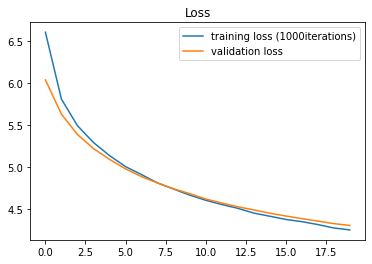

In [ ]:
plt.plot(trainlosslog, label = "training loss (1000iterations)")
plt.plot(validlosslog, label = "validation loss")
plt.title("Loss")
plt.legend()
plt.show()

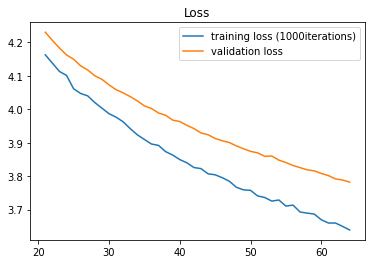

In [19]:
plt.plot([i+21 for i in range(len(trainlosslog))], trainlosslog, label = "training loss (1000iterations)")
plt.plot([i+21 for i in range(len(validlosslog))],validlosslog, label = "validation loss")
plt.title("Loss")
plt.legend()
plt.show()

after 10000 iterations:

In [33]:
for _ in range(10):
    i = np.random.choice([i for i in range(len(data.test))])
    print([data.indextovocab_en[d] for d in data.test[i]])
    print([data.indextovocab_fa[d] for d in data.test_fa0[i]])
    out = net.greedy_search(data.test[i],len(data.test[i]))
    print([data.indextovocab_fa[d] for d in out])
    print("____________")

['<SOS>', 'i', 'think', 'we', 'rather', 'drive', 'back', 'at', '<UKN>', 'past', 'nine', 'then', 'we', 'will', 'arrive', 'at', 'hamburg', 'at', '<UKN>', 'past', 'ten', '<EOS>']
['<SOS>', 'من', 'فکر', 'میکنم', 'بهتر', 'است', 'ساعت', 'نه', 'و', 'سی', 'و', 'سه', 'دقیقه', 'برگردیم', 'بنابرین', 'ساعت', 'ده', 'و', 'پنجاه', 'و', 'دو', 'دقیقه', 'به', 'هامبورگ', 'میرسیم', '<EOS>']
['<SOS>', 'من', 'می', 'توانم', 'در', 'روز', '5', 'آوریل', 'در', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<EOS>']
____________
['<SOS>', 'hello', 'should', 'we', 'go', 'by', 'car', 'to', 'hanover', '<EOS>']
['<SOS>', 'سلام', 'آیا', 'باید', 'با', 'ماشین', 'به', 'هانوور', 'برویم', '؟', '<EOS>']
['<S

after 64000 iteration:

In [20]:
test_index = np.random.choice([i for i in range(len(data.test))], 10)

In [21]:
test_index

array([130, 225, 102, 113,  42, 141, 189, 233, 102,   0])

In [28]:
for i in test_index:
    print([data.indextovocab_en[d] for d in data.test[i]])
    print([data.indextovocab_fa[d] for d in data.test_fa0[i]])
    out = net.greedy_search(data.test[i],len(data.test[i]))
    print([data.indextovocab_fa[d] for d in out])
    print("____________")

['<SOS>', 'i', 'agree', 'we', 'need', 'a', 'hotel', 'in', 'hanover', '<EOS>']
['<SOS>', 'موافقم', 'ما', 'در', 'هانوور', 'به', 'یک', 'هتل', 'احتیاج', 'داریم', '<EOS>']
['<SOS>', 'من', 'در', 'هتل', '<UKN>', 'در', 'هتل', '<UKN>', '<UKN>', 'می', 'بینم', 'که', 'ما', 'در', 'هتل', 'داریم', 'یک', 'هتل', 'داریم', 'و', 'یک', 'هتل', 'داریم', '<EOS>']
____________
['<SOS>', 'let', 'us', 'take', 'the', 'train', 'at', 'nine', '<UKN>', '<EOS>']
['<SOS>', 'اجازه', 'دهید', 'قطار', 'ساعت', 'نه', 'را', 'بگیریم', '<EOS>']
['<SOS>', 'ایالات', 'متحده', 'آمریکا', '<UKN>', 'را', 'به', 'یاد', 'آوردن', 'امکان', 'کار', 'در', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>'

In [30]:
ref = []
hypo = []
for i in range(len(data.test)):
    if i in [39, 60, 99, 216, 250]:
        continue
    out = net.greedy_search(data.test[i],len(data.test[i]))
    hypo.append(out)
    ref.append([data.test_fa0[i],data.test_fa1[i],data.test_fa2[i],data.test_fa3[i]])
print(bleu_score.corpus_bleu(ref, hypo))
print(nist_score.corpus_nist(ref, hypo))

0.022323224071226486
0.885949177001538


### Part 2:

In [43]:
class Data2:
    def __init__(self, file_name):
        self.english_sentence = []
        self.persian_sentence = []
        self.english_sentence_valid = []
        self.persian_sentence_valid = []
        self.test = []
        self.test_fa2 = []
        self.test_fa1 = []
        self.test_fa0 = []
        self.test_fa3 = []
        self.max_len = 0
        self.vocabtoindex_en  = {"<SOS>":0,"<padd>":1,"<EOS>":2, "<UKN>" : 3}
        self.vocabtocount_en  = {}
        self.indextovocab_en  = {0:"<SOS>",1:"<padd>",2:"<EOS>", 3: "<UKN>"}
        self.vocabtocount_fa  = {}
        self.vocabtoindex_fa  = {"<SOS>":0,"<padd>":1,"<EOS>":2, "<UKN>" : 3}
        self.indextovocab_fa  = {0:"<SOS>",1:"<padd>",2:"<EOS>", 3: "<UKN>"}
        validation = np.random.choice([9])
        tokenizer_en = pyonmttok.Tokenizer("aggressive", joiner_annotate=True, segment_numbers=True)
        self.embedding_en = pyonmttok.BPELearner(tokenizer=tokenizer_en, symbols=37000)      
        tokenizer_fa = pyonmttok.Tokenizer("aggressive", joiner_annotate=True, segment_numbers=True)
        self.embedding_fa = pyonmttok.BPELearner(tokenizer=tokenizer_fa, symbols=37000)
        with open(file_name+"AFEC-merged.en", 'r') as file:
            test_corpus = file.read()
            for l in test_corpus.split("\n"):
                self.embedding_en.ingest(l)
            self.embedding_en = self.embedding_en.learn("/content/gdrive/MyDrive/AFEC/enmodel")
            self.embedding_en = pyonmttok.Tokenizer("aggressive", bpe_model_path="/content/gdrive/MyDrive/AFEC/enmodel", joiner_annotate=True, segment_numbers=True)
        with open(file_name+"AFEC-merged.fa", 'r') as file:  
            test_corpus = file.read()
            for l in test_corpus.split("\n"):
                self.embedding_fa.ingest(l)
            self.embedding_fa = self.embedding_fa.learn("/content/gdrive/MyDrive/AFEC/famodel")
            self.embedding_fa = pyonmttok.Tokenizer("aggressive", bpe_model_path="/content/gdrive/MyDrive/AFEC/famodel", joiner_annotate=True, segment_numbers=True)
        counter = 0
        with open(file_name+"AFEC-merged.en", 'r') as file:
            data = file.read().split("\n")
            for d in data:
                self.counter_en(d)
        counter = 0
        with open(file_name+"AFEC-merged.en", 'r') as file:
            data = file.read().split("\n")
            for d in data:
                d = self.cleaner_en(d)
                if counter % 10 == validation:
                    self.english_sentence_valid.append(d)
                else:
                    self.english_sentence.append(d)
                if len(d) > self.max_len:
                    self.max_len = len(d)
                counter = counter + 1
        counter = 0
        with open(file_name+"AFEC-merged.fa", 'r') as file:
            data = file.read().split("\n")
            for d in data:
                self.counter_fa(d)
        counter = 0
        with open(file_name+"AFEC-merged.fa", 'r') as file:
            data = file.read().split("\n")
            for d in data:
                d = self.cleaner_fa(d)
                if counter % 10 == validation:
                    self.persian_sentence_valid.append(d)
                else:
                    self.persian_sentence.append(d)
                if len(d) > self.max_len:
                    self.max_len = len(d)
                counter = counter + 1
        with open(file_name+"/Test/test.en", 'r') as file:
            data = file.read().split("\n")
            for d in data:
                d = self.cleaner_en(d)
                self.test.append(d)
                if len(d)>self.max_len:
                    self.max_len = len(d)
        
        with open(file_name+"/Test/test.fa0", 'r') as file:
            data = file.read().split("\n")
            for d in data:
                d = self.cleaner_fa(d)
                self.test_fa0.append(d)
                if len(d)>self.max_len:
                    self.max_len = len(d)
        with open(file_name+"/Test/test.fa1", 'r') as file:
            data = file.read().split("\n")
            for d in data:
                d = self.cleaner_fa(d)
                self.test_fa1.append(d)
                if len(d)>self.max_len:
                    self.max_len = len(d)
        with open(file_name+"/Test/test.fa2", 'r') as file:
            data = file.read().split("\n")
            for d in data:
                d = self.cleaner_fa(d)
                self.test_fa2.append(d)
                if len(d)>self.max_len:
                    self.max_len = len(d)
        with open(file_name+"/Test/test.fa3", 'r') as file:
            data = file.read().split("\n")
            for d in data:
                d = self.cleaner_fa(d)
                self.test_fa3.append(d)
                if len(d)>self.max_len:
                    self.max_len = len(d)
    def cleaner_en(self, text):
        text = text.translate(str.maketrans('', '', string.punctuation))
        text = text.lower().replace("  ", " ").replace("  ", " ")
        token = self.embedding_en.tokenize(text)[0]
        token.insert(0,"<SOS>")
        token.append("<EOS>")
        tokens = []
        for t in token:
            if t not in self.vocabtocount_en or self.vocabtocount_en[t]> 10:
                if t not in self.vocabtoindex_en:
                    self.vocabtoindex_en[t] = len(self.vocabtoindex_en)
                    self.indextovocab_en[len(self.indextovocab_en)] = t
                tokens.append(self.vocabtoindex_en[t])
            else:
                tokens.append(3)
        return np.array(tokens)
    def counter_en(self, text):
        text = text.translate(str.maketrans('', '', string.punctuation))
        text = text.lower().replace("  ", " ").replace("  ", " ")
        token = self.embedding_en.tokenize(text)[0]
        token.insert(0,"<SOS>")
        token.append("<EOS>")
        for t in token:
            if t not in self.vocabtocount_en:
                self.vocabtocount_en[t] = 0
            else:
                self.vocabtocount_en[t] = self.vocabtocount_en[t] + 1
        return 
    def cleaner_fa(self, text):
        text = text.translate(str.maketrans('', '', string.punctuation))
        text = text.replace("  ", " ").replace("  ", " ").replace("\u200c"," ").replace("\xad"," ")
        normalizer = Normalizer()
        token = self.embedding_fa.tokenize(normalizer.normalize(text))[0]
        token.insert(0,"<SOS>")
        token.append("<EOS>")
        tokens = []
        for t in token:
            if t not in self.vocabtocount_fa or self.vocabtocount_fa[t] > 10:
                if t not in self.vocabtoindex_fa:
                    self.vocabtoindex_fa[t] = len(self.vocabtoindex_fa)
                    self.indextovocab_fa[len(self.indextovocab_fa)] = t
                tokens.append(self.vocabtoindex_fa[t])
            else:
                tokens.append(3)
        return np.array(tokens)
    def counter_fa(self, text):
        text = text.translate(str.maketrans('', '', string.punctuation))
        text = text.replace("  ", " ").replace("  ", " ").replace("\u200c"," ").replace("\xad"," ")
        normalizer = Normalizer()
        token = self.embedding_fa.tokenize(normalizer.normalize(text))[0]
        token.insert(0,"<SOS>")
        token.append("<EOS>")
        for t in token:
            if t not in self.vocabtocount_fa:
                self.vocabtocount_fa[t] = 0
            else:
                self.vocabtocount_fa[t] = self.vocabtocount_fa[t] + 1
        return 

In [45]:
batch_size = 64
emd_size_encoder = 256
num_heads_encoder = 8
emd_size_decoder = 256
num_heads_decoder = 8
dim_key = 64
dim_value = 64
dim_inner = 1024
enc_layer = 3
dec_layer = 3
lr = 0.0001
Betas=(0.9, 0.98)
eps=1e-9
en_vocab = len(data2.vocabtoindex_en)
fa_vocab = len(data2.vocabtoindex_fa)
max_len = data2.max_len

In [44]:
data2 = Data2("/content/gdrive/MyDrive/AFEC/")

In [ ]:
def initialize_weights(m):
    if hasattr(m, 'weight') and m.weight.dim() > 1:
        nn.init.xavier_uniform_(m.weight.data)
device_flag_gpu = True
net = Translator(en_vocab, fa_vocab, emd_size_encoder, max_len, enc_layer, dec_layer,  num_heads_encoder, num_heads_decoder, dim_key, dim_value, dim_inner, 1)
if False:
    net.load_state_dict(torch.load('/content/gdrive/MyDrive/net'))
    net.eval()
net.cuda()
net.apply(initialize_weights)
optimizer =  optim.Adam(net.parameters(), lr=lr, betas=Betas, eps = eps)
loss = nn.CrossEntropyLoss(ignore_index=1)#
trainlosslog = []
validlosslog = []
print("training loss, validation loss")
for j in range(10):
    batchindxs = creat_minibatch(data2.english_sentence, batch_size)
    losslog = []
    i = 0
    if True:
    #for i in range(9):
        for batchindx in batchindxs[i*1000:min(len(batchindxs),i*1000+1000)]:
            x1 = np.array(data2.english_sentence)[batchindx]
            x2 = np.array(data2.persian_sentence)[batchindx]
            l1 = np.max([len(t) for t in x1])
            l2 = np.max([len(t) for t in x2])
            x1, input_mask = padd(x1,max(l1,l2))
            x2, output_mask = padd(x2,max(l1,l2), True)
            out = net(torch.tensor(x1).cuda(),torch.tensor(np.array(x2)[:,:-1]).cuda(), input_mask.cuda(), output_mask.cuda())
            #x = torch.argmax(out[0],dim = -1)
            #print([data.indextovocab_fa[d] for d in x2[0]])
            #print([data.indextovocab_fa[d] for d in x.tolist()])
            out = loss(out.contiguous().reshape(-1, out.shape[2]),torch.tensor(np.array(x2)[:,1:]).contiguous().view(-1).long().cuda())
            losslog.append(out.cpu().detach().numpy())
            #print(losslog[-1])
            optimizer.zero_grad()
            out.backward()
            torch.nn.utils.clip_grad_norm_(net.parameters(), 5)
            optimizer.step()  
        trainlosslog.append(np.mean(losslog))
        torch.save(net.state_dict(), '/content/gdrive/MyDrive/AFEC/netpart2v3')
        losslog = []
        batchindxs = creat_minibatch(data2.english_sentence_valid, batch_size)
        for batchindx in batchindxs:
            x1 = np.array(data2.english_sentence_valid)[batchindx]
            x2 = np.array(data2.persian_sentence_valid)[batchindx]
            l1 = np.max([len(t) for t in x1])
            l2 = np.max([len(t) for t in x2])
            x1, input_mask = padd(x1,max(l1,l2))
            x2, output_mask = padd(x2,max(l1,l2), True)
            out = net(torch.tensor(x1).cuda(),torch.tensor(x2)[:,:-1].cuda(), input_mask.cuda(), output_mask.cuda())
            out = loss(out.contiguous().reshape(-1, out.shape[2]),torch.tensor(np.array(x2))[:,1:].contiguous().view(-1).long().cuda())
            losslog.append(out.cpu().detach().numpy())
            #optimizer.zero_grad()
            #out.backward()
            #optimizer.step()  
        validlosslog.append(np.mean(losslog))
        print(trainlosslog[-1], validlosslog[-1])

training loss, validation loss


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:143: UserWarning: 

6.8819876 6.2448955
6.050882 5.89783
5.7756243 5.685952
5.5836153 5.522482
5.451088 5.404766
5.3273573 5.2902484
5.2216687 5.2062516
5.133866 5.1075716
5.0488253 5.023158
4.959972 4.960394


In [47]:
for _ in range(10):
    i = np.random.choice([i for i in range(len(data2.test))])
    print([data2.indextovocab_en[d] for d in data2.test[i]])
    print([data2.indextovocab_fa[d] for d in data2.test_fa0[i]])
    out = net.greedy_search(data2.test[i],len(data2.test[i]))
    print([data2.indextovocab_fa[d] for d in out])
    print("____________")

['<SOS>', 'fine', 'and', 'where', 'at', 'the', 'station', '<EOS>']
['<SOS>', 'خوب', 'است', 'و', 'در', 'کجای', 'ایستگاه', '￭؟', '<EOS>']
['<SOS>', 'و', 'این', 'یک', 'یک', 'است', 'که', 'در', 'حال', 'حاضر', 'است', 'که', 'در', 'حال', 'حاضر', 'یک', 'یک', 'یک', 'یک', 'یک', 'است', 'که', 'در', 'حال', 'حاضر', 'است', 'که', 'در', 'حال', 'حاضر', 'یک', 'یک', 'یک', 'یک', 'یک', 'یک', 'یک', 'است', 'که', 'در', 'یک', 'یک', 'یک', 'یک', 'یک', 'یک', 'یک', 'یک', 'یک', 'است', 'که', 'در', 'یک', 'چیزی', 'است', 'که', 'در', 'آن', 'است', 'که', 'در', 'آن', 'چیزی', 'است', 'که', 'می', '￭\u200c￭', 'باشد', '<EOS>']
____________
['<SOS>', 'i', 'could', 'but', 'i', 'dont', 'do', 'it', '<EOS>']
['<SOS>', 'من', 'میتوانستم', '￭،', 'اما', 'آن', 'را', 'انجام', '<UKN>', '<EOS>']
['<SOS>', 'این', 'است', 'که', 'این', 'یک', 'است', 'که', 'این', 'یک', 'است', 'که', 'این', 'یک', 'یک', 'است', 'که', 'است', 'که', 'این', 'یک', 'یک', 'یک', 'است', 'که', 'است', 'که', 'این', 'یک', 'یک', 'یک', 'یک', 'یک', 'است', 'که', 'است', 'که', 'این', 'یک

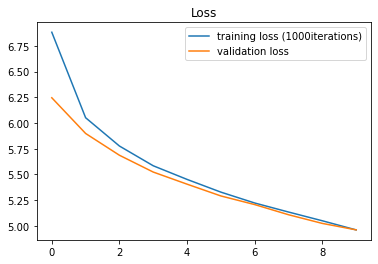

In [ ]:
plt.plot(trainlosslog, label = "training loss (1000iterations)")
plt.plot(validlosslog, label = "validation loss")
plt.title("Loss")
plt.legend()
plt.show()

In [ ]:
for batchindx in [[i for i in range(16)], [i+16 for i in range(16)]]:
        x1 = np.array(data2.english_sentence_valid)[batchindx]
        x2 = np.array(data2.persian_sentence_valid)[batchindx]
        l1 = np.max([len(t) for t in x1])
        l2 = np.max([len(t) for t in x2])
        x1, input_mask = padd(x1,max(l1,l2))
        x2, output_mask = padd(x2,max(l1,l2), True)
        out = net(torch.tensor(x1).cuda(),torch.tensor(x2).cuda(), input_mask.cuda(), output_mask.cuda())
        x = torch.argmax(out[0],dim = -1)
        print([data2.indextovocab_en[d] for d in x1[0]])
        print([data2.indextovocab_fa[d] for d in x.tolist()])
        out = loss(out.reshape(-1, out.shape[2]),torch.tensor(x2).view(-1).long().cuda())

['<SOS>', 'taji￭', 'ks', 'have', 'until', 'j￭', 'uly', '1', '2￭', '0￭', '0￭', '9', 'to', 'leg￭', 'al￭', 'ise', 'their', 'pro￭', 'per￭', 'ty', 'hol￭', 'd￭', 'ings', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<padd>', '<EOS>']
['<SOS>', 'مردم', 'تاجیکستان', 'تا', 'اول', 'ژوئیه', 'سال', '۲￭', '۰￭', '۰￭', '۹', 'فرصت', 'دارند', 'تا', 'دارایی', '￭\u200c￭', 'های', 'خود', 'را', 'قانونی', 'کنند', 'عقب', 'هستم', 'بغ￭', 'دود', 'دود', 'لغ￭', 'پزشکان', 'اهای', 'اهای', 'خواند', 'دید￭', 'ریت', 'اهای', 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTenso

T

In [48]:
ref = []
hypo = []
for i in range(len(data2.test)):
    if i in [39, 60, 99, 216, 250]:
        continue
    out = net.greedy_search(data2.test[i],len(data2.test[i]))
    hypo.append(out)
    ref.append([data2.test_fa0[i],data2.test_fa1[i],data2.test_fa2[i],data2.test_fa3[i]])
print(bleu_score.corpus_bleu(ref, hypo))
print(nist_score.corpus_nist(ref, hypo))

0.0017632204962886612
0.2976746546102509


### no residual:

In [37]:
class SelfAttention(nn.Module):
    def __init__(self, emd_size, num_heads, dim_key, dim_value, d_k, eps=1e-5):
        super().__init__()
        self.query_linear = nn.Linear(emd_size,num_heads*dim_key)
        self.key_linear = nn.Linear(emd_size, num_heads * dim_key)
        self.value_linear = nn.Linear(emd_size, num_heads*dim_value)
        self.attention = Attention(num_heads, dim_key, dim_value, math.sqrt(d_k))
        self.layernorm = nn.LayerNorm((emd_size,), elementwise_affine=True, eps=eps)#[d_model]
        self.linear = nn.Linear(num_heads* dim_value, emd_size)
        self.dropout = nn.Dropout(0.1)
        self.num_heads = num_heads
        self.dim_key = dim_key
        self.dim_value = dim_value
        #self.head_dim = emd_size//num_heads
    
    def forward(self, x, input_mask):
        #print("x shape")
        #print(x.shape)
        q = self.query_linear(x)
        k = self.key_linear(x)
        v = self.value_linear(x)
        #print("qkv shape")
        #print(q.shape, k.shape, v.shape) #batch_size, seq_length, num_heads*dim_key/value
        #x = self.attention(q,k,v,self.scale)
        '''attn_scores = torch.bmm(q, k.permute(0, 2, 1))/self.scale#torch.matmul(q, k.transpose(-2, -1))/self.scale
        softmax = nn.Softmax(dim=-1)
        attention = softmax(attn_scores)
        values = torch.matmul(attention, v)'''
        attention = self.attention(q, k, v, input_mask).reshape(x.shape[0], x.shape[1], self.num_heads * self.dim_value)
        #attention?
        return self.layernorm(self.dropout(self.linear(attention)))
class Encoder(nn.Module):
    def __init__(self, emd_size, num_heads, dim_key, dim_value, dim_inner, eps):
        super().__init__()
        d_k = dim_key#????
        self.multiheadattention = SelfAttention(emd_size, num_heads, dim_key, dim_value, d_k, eps)
        #self.layernorm = nn.LayerNorm((emd_size,), elementwise_affine=True, eps=eps)
        self.feedforward = POS_FFN(emd_size, dim_inner, eps )
    def  forward(self, x, input_mask, adding = True):
        mha = self.multiheadattention(x, input_mask)
        #if adding:
        #    x = x + mha
        #else:
        #   x = mha#? x = x
        #xnorm = self.layernorm(x)
        #x = xnorm + self.feedforward(xnorm) #xnorm + ?
        return self.feedforward(mha)

In [ ]:
def initialize_weights(m):
    if hasattr(m, 'weight') and m.weight.dim() > 1:
        nn.init.xavier_uniform_(m.weight.data)
device_flag_gpu = True
net = Translator(en_vocab, fa_vocab, emd_size_encoder, max_len, enc_layer, dec_layer,  num_heads_encoder, num_heads_decoder, dim_key, dim_value, dim_inner, 1)
if False:
    net.load_state_dict(torch.load('/content/gdrive/MyDrive/net'))
    net.eval()
net.cuda()
net.apply(initialize_weights)
optimizer =  optim.Adam(net.parameters(), lr=lr, betas=Betas, eps = eps)
loss = nn.CrossEntropyLoss(ignore_index=1)#
trainlosslog = []
validlosslog = []
print("training loss, validation loss")
for j in range(10):
    batchindxs = creat_minibatch(data.english_sentence, batch_size)
    losslog = []
    i = 0
    #for i in range(9):
    if True:
        for batchindx in batchindxs[i*1000:min(len(batchindxs),i*1000+1000)]:
            x1 = np.array(data.english_sentence)[batchindx]
            x2 = np.array(data.persian_sentence)[batchindx]
            l1 = np.max([len(t) for t in x1])
            l2 = np.max([len(t) for t in x2])
            x1, input_mask = padd(x1,max(l1,l2))
            x2, output_mask = padd(x2,max(l1,l2), True)
            out = net(torch.tensor(x1).cuda(),torch.tensor(np.array(x2)[:,:-1]).cuda(), input_mask.cuda(), output_mask.cuda())
            #x = torch.argmax(out[0],dim = -1)
            #print([data.indextovocab_fa[d] for d in x2[0]])
            #print([data.indextovocab_fa[d] for d in x.tolist()])
            out = loss(out.contiguous().reshape(-1, out.shape[2]),torch.tensor(np.array(x2)[:,1:]).contiguous().view(-1).long().cuda())
            losslog.append(out.cpu().detach().numpy())
            #print(losslog[-1])
            optimizer.zero_grad()
            out.backward()
            torch.nn.utils.clip_grad_norm_(net.parameters(), 5)
            optimizer.step()  
        trainlosslog.append(np.mean(losslog))
        torch.save(net.state_dict(), '/content/gdrive/MyDrive/AFEC/netpart3v1')
        losslog = []
        batchindxs = creat_minibatch(data.english_sentence_valid, batch_size)
        for batchindx in batchindxs:
            x1 = np.array(data.english_sentence_valid)[batchindx]
            x2 = np.array(data.persian_sentence_valid)[batchindx]
            l1 = np.max([len(t) for t in x1])
            l2 = np.max([len(t) for t in x2])
            x1, input_mask = padd(x1,max(l1,l2))
            x2, output_mask = padd(x2,max(l1,l2), True)
            out = net(torch.tensor(x1).cuda(),torch.tensor(x2)[:,:-1].cuda(), input_mask.cuda(), output_mask.cuda())
            out = loss(out.contiguous().reshape(-1, out.shape[2]),torch.tensor(np.array(x2))[:,1:].contiguous().view(-1).long().cuda())
            losslog.append(out.cpu().detach().numpy())
            #optimizer.zero_grad()
            #out.backward()
            #optimizer.step()  
        validlosslog.append(np.mean(losslog))
        print(trainlosslog[-1], validlosslog[-1])

training loss, validation loss


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:143: UserWarning: 

6.969485 6.463413
6.27223 6.116782
5.9876633 5.896874
5.7956414 5.7214055
5.647919 5.5962896
5.5189624 5.485769
5.42074 5.3839893
5.334991 5.3110814
5.2555223 5.2413926
5.1880913 5.1852474


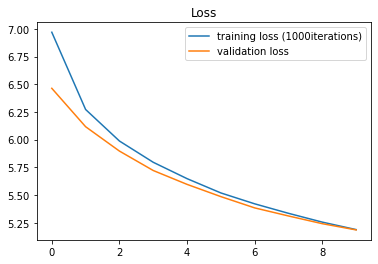

In [ ]:
plt.plot(trainlosslog, label = "training loss (1000iterations)")
plt.plot(validlosslog, label = "validation loss")
plt.title("Loss")
plt.legend()
plt.show()

In [39]:
test_index = np.random.choice([i for i in range(len(data.test))], 10)

In [40]:
for i in test_index:
    print([data.indextovocab_en[d] for d in data.test[i]])
    print([data.indextovocab_fa[d] for d in data.test_fa0[i]])
    out = net.greedy_search(data.test[i],len(data.test[i]))
    print([data.indextovocab_fa[d] for d in out])
    print("____________")

['<SOS>', 'i', 'would', 'like', 'to', 'be', 'in', 'hanover', 'until', 'noon', 'but', 'i', 'still', 'do', 'not', 'know', 'if', 'you', 'want', 'to', 'fly', 'or', 'to', 'drive', '<EOS>']
['<SOS>', 'دوست', 'دارم', 'تا', 'ظهر', 'در', 'هانوور', 'باشم', '،', 'اما', 'هنوز', 'نمیدانم', 'آیا', 'میخواهی', 'پرواز', 'کنی', 'یا', 'رانندگی', '؟', '<EOS>']
['<SOS>', 'من', 'می', 'توانم', 'که', 'شما', 'را', 'به', 'شما', 'می', '<UKN>', 'یا', 'نه', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<UKN>', '<EOS>']
____________
['<SOS>', 'yes', 'i', 'would', 'suggest', 'the', 'flight', 'at', 'a', 'quarter', 'past', 'seven', '<EOS>']
['<SOS>', 'بله', '،', 'من', 'پرواز', 'ساعت

In [41]:
ref = []
hypo = []
for i in range(len(data.test)):
    if i in [39, 60, 99, 216, 250]:
        continue
    out = net.greedy_search(data.test[i],len(data.test[i]))
    hypo.append(out)
    ref.append([data.test_fa0[i],data.test_fa1[i],data.test_fa2[i],data.test_fa3[i]])
print(bleu_score.corpus_bleu(ref, hypo))
print(nist_score.corpus_nist(ref, hypo))

0.009131844212666005
0.6892186429098422
